In [9]:
# importing the dataset

import pandas as pd
df = pd.read_csv(r"C:\Users\adishree.b\Documents\part 1 ass 1.csv")

### 1)  Check for null values in vehicle type column, replace it with ‘Others’, check for null values for all features, Gearbox nans can be called “Unspecified”, fuelType can be called “Others”

In [10]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
# Checking the null values in the vehicleType column:

df['vehicleType'].isnull().value_counts()

False    2748
True      334
Name: vehicleType, dtype: int64

In [16]:
# replacing the null values with 'Others':

df['vehicleType'].fillna('Others',inplace = True)

In [17]:
# checking the null values in the vehicleType column:

df['vehicleType'].isnull().value_counts()

False    3082
Name: vehicleType, dtype: int64

In [20]:
# we can see that there are Others inplace of null values

df['vehicleType'].value_counts()

limousine     804
kleinwagen    647
kombi         552
Others        334
bus           238
cabrio        188
coupe         171
suv           110
andere         38
Name: vehicleType, dtype: int64

In [22]:
# Checking the null values in all the features

df.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                162
powerPS                  0
model                  154
kilometer                0
monthOfRegistration      0
fuelType               292
brand                    0
notRepairedDamage      613
dateCreated              0
nrOfPictures             0
postalCode               0
lastSeen                 0
dtype: int64

In [23]:
# replacing na values in gearbox with 'Unspecigfied' and fuelType with 'Others' just like we did above for vehicleType

df['gearbox'].fillna('Unspecified',inplace = True)
df['fuelType'].fillna('Others',inplace = True)

In [28]:
# we can see that the values 'Unspecified' in gearbox and 'Others' in fuelType have replaced the nan values

print('value counts in gearbox \n', df['gearbox'].value_counts(), '\n' , '\n', 'value counts in fuelType \n', df['fuelType'].value_counts())

value counts in gearbox 
 manuell        2275
automatik       645
Unspecified     162
Name: gearbox, dtype: int64 
 
 value counts in fuelType 
 benzin    1850
diesel     898
Others     292
lpg         37
andere       3
hybrid       1
cng          1
Name: fuelType, dtype: int64


### 2) Replace the values in Offer column to English language.

In [29]:
# checking the values present in the offerType column (mentioned as offer column in the question):

df['offerType'].value_counts()

Angebot    3082
Name: offerType, dtype: int64

In [30]:
# The only value present in the offerType column is 'Angebot'.
# Googling the word 'Angebot', we can find out that it is a German word, which means 'offer' in English.
# Hence, we wil replace the word 'Angebot' with 'offer' as per the question.

df['offerType'] = df['offerType'].replace({'Angebot':'offer'})

In [31]:
# now we can see below the values of the offerType is showing 'offer' instead of 'Angebot'

df['offerType'].value_counts()

offer    3082
Name: offerType, dtype: int64

### 3) Plot the distribution of vehicles based on their years of registration

In [ ]:
# To create the distribution of vehicles based on their years of registration, we will do the following:
# Plot number of vehicles registered in each year chronologically. i.e. x-axis = yearOfRegistration, y-axis = number of vehicles

### Steps
# 1 find the number of vehicles registered in each year             {df['yearOfRegistration'].value_counts()}
# 2 sort the result by 'yearOfRegistration' in ascending order      {with sort_index() since the year column is index here}
# 3 plot the result with barplot                                    {with plot.bar() function}

# combining all 3 steps, we can get the output plot in one line as below

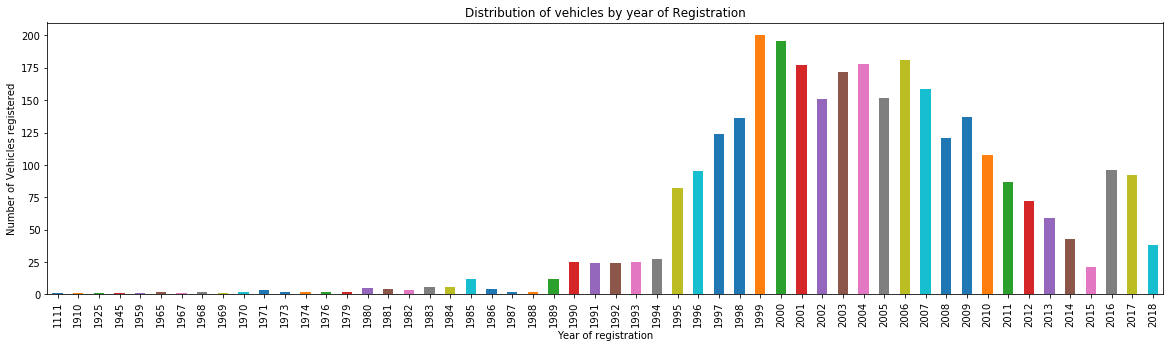

In [95]:
fig = plt.figure(figsize=(20,5))
plt.xlabel('Year of registration')
plt.ylabel('Number of Vehicles registered')
plt.title('Distribution of vehicles by year of Registration')
df['yearOfRegistration'].value_counts().sort_index().plot.bar()

### 4) Clean the logical issues (Quality issues) within yearOfRegistration column (Figure out what is the problem yourself)


In [107]:
# One logical issue is that one of the value in the yearOfRegistration column shows 1111.
#Lets check if there rows where values are less than 1900.
df[df['yearOfRegistration']<=1900].shape

(1, 20)

In [108]:
# There is only one row which has registration year less than 1900.
# It can't be possible because there were no cars before 1800s. Hence, we will delete this row.
# For this, let's create a new df(df1) where only the year of registration greater than 1900 are present. 

df1 = df[df['yearOfRegistration']>=1900]
df1['yearOfRegistration'].min()

1910

In [ ]:
# We can see that the minimum value in year of registration is 1910, which seems logical.
# We also checked the na values in the 1st questions and this column had no na values.
# Looking at the plot created in Ques 3, we don't see any other logical issues.

### 5) Plot a box plot of the price for each vehicle type.

In [122]:
# let's check the vehicle types and see how many types are there
df1['vehicleType'].value_counts()

limousine     804
kleinwagen    647
kombi         552
Others        333
bus           238
cabrio        188
coupe         171
suv           110
andere         38
Name: vehicleType, dtype: int64

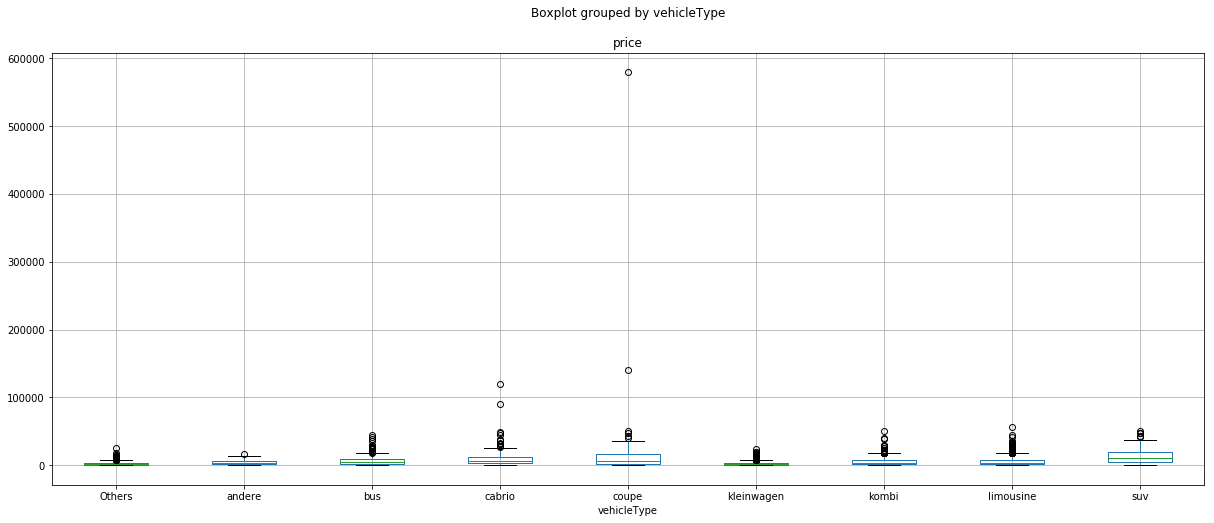

In [129]:
# Creating the boxplot of the price for each vehicleType:

boxplot = df1.boxplot(column=['price'], by = 'vehicleType', figsize= (20,8))

### 6) Provide Descriptive Statistics for the price column.

In [128]:
# getting the descriptive statistics for price column

df1['price'].describe()

count      3081.000000
mean       5876.188251
std       12970.416767
min           0.000000
25%        1200.000000
50%        2999.000000
75%        7255.000000
max      579000.000000
Name: price, dtype: float64

### 7) Remove the outliers based on the previous statistics found in 6. You can assume that outliers are the values greater than this value. IQR*1.5 + Median.

In [133]:
# since the outliers values are values greater than (IQR*1.5 + Median), we will create the threshold value
# we can then remove the rows that have values greater than the threshold value

Q3 = 7255
Q1 = 1200
Median = 2999
IQR = Q3 - Q1
outliers_threshold = IQR*1.5 + Median
print(outliers_threshold)

12081.5


In [150]:
# Removing the rows where price is in the outlier and then checking the max values as well as the descriptive statistics again
# and see the differences after the removal of outliers

df2 = df[df['price']<=outliers_threshold]

print('the previous max value was: ', df1['price'].max(), '\n','the previous max value is: ', df2['price'].max())
print('\n', 'new descriptive statistics: \n\n', df2['price'].describe())

the previous max value was:  579000 
 the previous max value is:  12000

 new descriptive statistics: 

 count     2672.000000
mean      3372.688623
std       3003.545504
min          0.000000
25%        999.750000
50%       2400.000000
75%       4999.000000
max      12000.000000
Name: price, dtype: float64
